In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
# Se cargan las dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

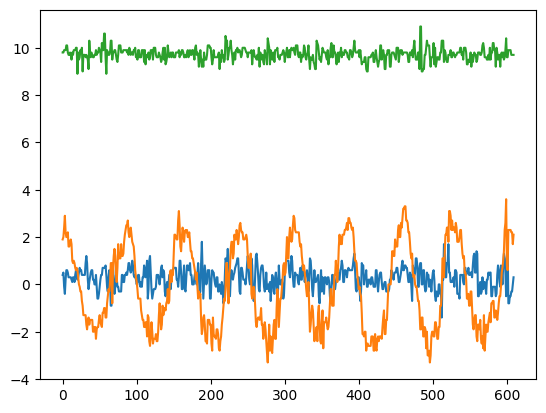

In [27]:
RutaFile="/content/gdrive/MyDrive/Colab Notebooks/Datos/Acelerometro/testing/Terrestre.3srfh2gn.ingestion-64b7fb5c59-sptfp.json"
dataframe = pd.read_json(RutaFile)
print(dataframe.to_string()) 
Valores = dataframe.iloc[:,:].values
print(Valores.shape)
print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [28]:
import os
directory = '/content/gdrive/MyDrive/Colab Notebooks/Datos/Acelerometro/training/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

Datos=np.zeros((cantidadFiles*624,3))
i = 0
for file in files:
  print(file)
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  Datos[i*600:(i+1)*600] = DatosOriNP[0:600]
  i+=1
print(Datos.shape)



Bodega.3srf74rl.ingestion-64b7fb5c59-wt5jx.json
Bodega.3srf7p08.ingestion-64b7fb5c59-8hv2s.json
Bodega.3srf95bj.ingestion-64b7fb5c59-sptfp.json
Bodega.3srf9l68.ingestion-64b7fb5c59-wt5jx.json
Cargue.3srfilur.ingestion-64b7fb5c59-wt5jx.json
Cargue.3srfjb7b.ingestion-64b7fb5c59-8hv2s.json
Cargue.3srfjtoh.ingestion-64b7fb5c59-sptfp.json
Cargue.3srfkds0.ingestion-64b7fb5c59-wt5jx.json
Maritimo.3srfmvf2.ingestion-64b7fb5c59-sptfp.json
Maritimo.3srfnq35.ingestion-64b7fb5c59-8hv2s.json
Maritimo.3srfoavp.ingestion-64b7fb5c59-8hv2s.json
Maritimo.3srforqo.ingestion-64b7fb5c59-wt5jx.json
Maritimo.3srfpbdl.ingestion-64b7fb5c59-8hv2s.json
Terrestre.3srfcr0u.ingestion-64b7fb5c59-sptfp.json
Terrestre.3srfedor.ingestion-64b7fb5c59-sptfp.json
Terrestre.3srff3vb.ingestion-64b7fb5c59-sptfp.json
Terrestre.3srffkpi.ingestion-64b7fb5c59-sptfp.json
(10608, 3)


In [5]:
import os
directory = '/content/gdrive/MyDrive/Colab Notebooks/Datos/Acelerometro/training/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

Datos=np.zeros((cantidadFiles*624,3))
i = 0
for file in files:
  print(file)
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  Datos[i*len(DatosOriNP):(i+1)*len(DatosOriNP)] = DatosOriNP
  i+=1
print(Datos.shape)


Bodega.3srf74rl.ingestion-64b7fb5c59-wt5jx.json
Bodega.3srf7p08.ingestion-64b7fb5c59-8hv2s.json
Bodega.3srf95bj.ingestion-64b7fb5c59-sptfp.json
Bodega.3srf9l68.ingestion-64b7fb5c59-wt5jx.json
Cargue.3srfilur.ingestion-64b7fb5c59-wt5jx.json
Cargue.3srfjb7b.ingestion-64b7fb5c59-8hv2s.json
Cargue.3srfjtoh.ingestion-64b7fb5c59-sptfp.json
Cargue.3srfkds0.ingestion-64b7fb5c59-wt5jx.json
Maritimo.3srfmvf2.ingestion-64b7fb5c59-sptfp.json
Maritimo.3srfnq35.ingestion-64b7fb5c59-8hv2s.json
Maritimo.3srfoavp.ingestion-64b7fb5c59-8hv2s.json
Maritimo.3srforqo.ingestion-64b7fb5c59-wt5jx.json
Maritimo.3srfpbdl.ingestion-64b7fb5c59-8hv2s.json
Terrestre.3srfcr0u.ingestion-64b7fb5c59-sptfp.json
Terrestre.3srfedor.ingestion-64b7fb5c59-sptfp.json
Terrestre.3srff3vb.ingestion-64b7fb5c59-sptfp.json
Terrestre.3srffkpi.ingestion-64b7fb5c59-sptfp.json
(10608, 3)


In [29]:
print(files)

['Bodega.3srf74rl.ingestion-64b7fb5c59-wt5jx.json', 'Bodega.3srf7p08.ingestion-64b7fb5c59-8hv2s.json', 'Bodega.3srf95bj.ingestion-64b7fb5c59-sptfp.json', 'Bodega.3srf9l68.ingestion-64b7fb5c59-wt5jx.json', 'Cargue.3srfilur.ingestion-64b7fb5c59-wt5jx.json', 'Cargue.3srfjb7b.ingestion-64b7fb5c59-8hv2s.json', 'Cargue.3srfjtoh.ingestion-64b7fb5c59-sptfp.json', 'Cargue.3srfkds0.ingestion-64b7fb5c59-wt5jx.json', 'Maritimo.3srfmvf2.ingestion-64b7fb5c59-sptfp.json', 'Maritimo.3srfnq35.ingestion-64b7fb5c59-8hv2s.json', 'Maritimo.3srfoavp.ingestion-64b7fb5c59-8hv2s.json', 'Maritimo.3srforqo.ingestion-64b7fb5c59-wt5jx.json', 'Maritimo.3srfpbdl.ingestion-64b7fb5c59-8hv2s.json', 'Terrestre.3srfcr0u.ingestion-64b7fb5c59-sptfp.json', 'Terrestre.3srfedor.ingestion-64b7fb5c59-sptfp.json', 'Terrestre.3srff3vb.ingestion-64b7fb5c59-sptfp.json', 'Terrestre.3srffkpi.ingestion-64b7fb5c59-sptfp.json']


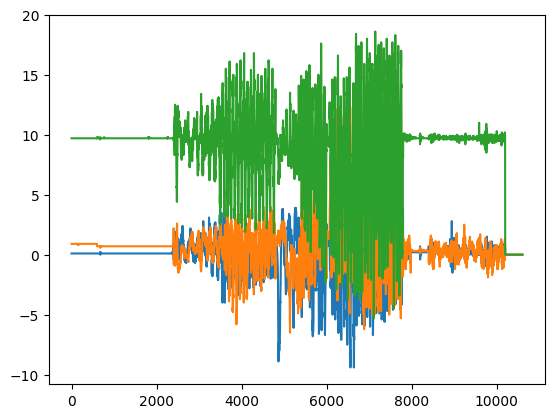

In [30]:
plt.plot(Datos)

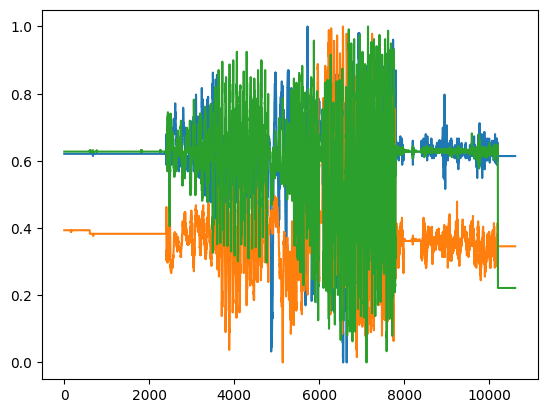

In [31]:
scaler1 = MinMaxScaler()
scaler1.fit(Datos)
DatosN=scaler1.transform(Datos)
plt.plot(DatosN)

In [32]:
Xtrain=np.zeros((96,300))

for i in range(96):
    Xtrain[i,:]=np.concatenate((DatosN[i*100:(i+1)*100,0].T,DatosN[i*100:(i+1)*100,1].T,DatosN[i*100:(i+1)*100,2].T),axis=0)

print(Xtrain.shape)


(96, 300)


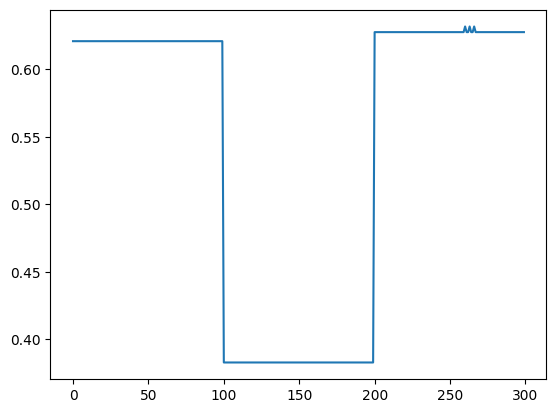

In [33]:
plt.plot(Xtrain[22,:])

In [35]:
YtrainIni=np.zeros((96,1))
for i in range(24):
    YtrainIni[i]=0 #Seat

for i in range(24,48):
    YtrainIni[i]=1 # Walking

for i in range(48,72):
    YtrainIni[i]=2 # Wave

for i in range(72,96):
    YtrainIni[i]=3 # Wav

print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]


In [36]:
Ytrain= to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                3010      
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 30)                630       
                                                                 
 dense_7 (Dense)             (None, 4)                 124       
                                                                 
Total params: 3,984
Trainable params: 3,984
Non-trainable params: 0
_________________________________________________________________


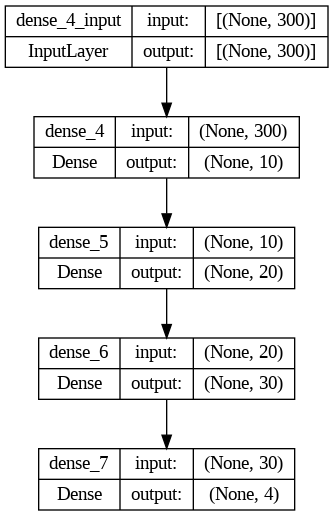

In [39]:

#Definición del modelo
modelo = Sequential()
modelo.add(Dense(10,input_shape=(300,),activation='relu'))
modelo.add(Dense(20,activation='relu'))
modelo.add(Dense(30,activation='relu'))
modelo.add(Dense(4, activation = 'softmax'))

modelo.summary()

keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [40]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo.fit(Xtrain,Ytrain, epochs=1000,batch_size=None,verbose=0)


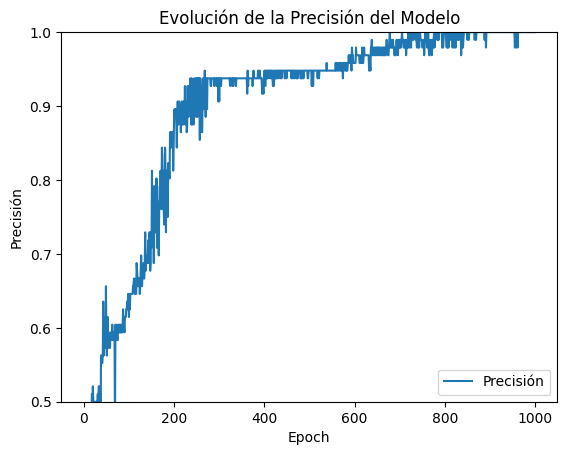

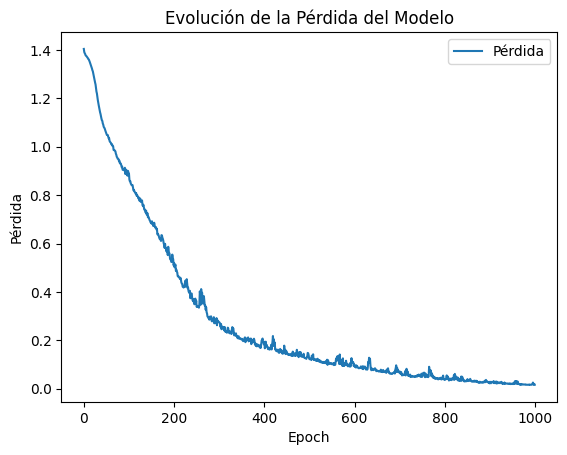

In [41]:
plt.plot(historia.history['accuracy'], label='Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

['Bodega.3srf88rd.ingestion-64b7fb5c59-wt5jx.json', 'Bodega.3srf8ms9.ingestion-64b7fb5c59-8hv2s.json', 'Cargue.3srfkvcm.ingestion-64b7fb5c59-sptfp.json', 'Cargue.3srflgqa.ingestion-64b7fb5c59-sptfp.json', 'Maritimo.3srfpsd9.ingestion-64b7fb5c59-sptfp.json', 'Maritimo.3srfqfqr.ingestion-64b7fb5c59-8hv2s.json', 'Terrestre.3srfgdrv.ingestion-64b7fb5c59-sptfp.json', 'Terrestre.3srfh2gn.ingestion-64b7fb5c59-sptfp.json']
(4992, 3)


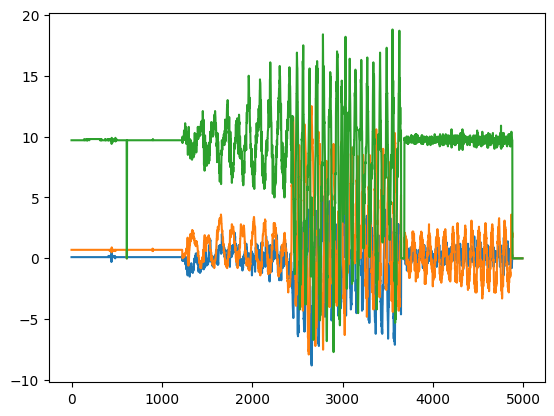

In [57]:
import os
directory = '/content/gdrive/MyDrive/Colab Notebooks/Datos/Acelerometro/testing/'
files = os.listdir(directory)
files.sort()
print(files)
cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*624,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*len(DatosOriNP):(i+1)*len(DatosOriNP)] = DatosOriNP
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

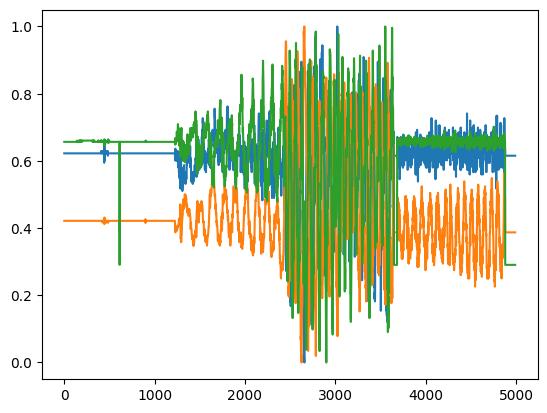

In [58]:
scaler3 = MinMaxScaler()
scaler3.fit(DatosVal)
DatosValN=scaler3.transform(DatosVal)
plt.plot(DatosValN)

In [59]:
XVal=np.zeros((45,300))
for i in range(45):
    XVal[i,:]=np.concatenate((DatosValN[i*100:(i+1)*100,0].T,DatosValN[i*100:(i+1)*100,1].T,DatosValN[i*100:(i+1)*100,2].T),axis=0)

print(XVal.shape)



(45, 300)


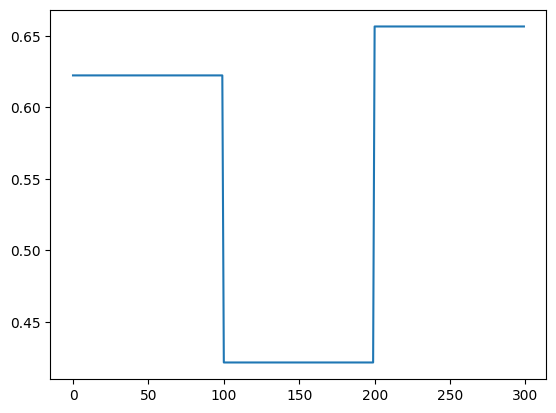

In [60]:
plt.plot(XVal[10,:])

In [63]:
YValIni=np.zeros((45,1))
for i in range(12):
    YValIni[i]=0

for i in range(12,24):
    YValIni[i]=1

for i in range(24,32):
    YValIni[i]=2 

for i in range(32,45):
    YValIni[i]=3   

print(YValIni)
YVal= to_categorical(YValIni)

print(YVal)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [64]:
modelo.evaluate(XVal, YVal)

2/2 [==============================] - 0s 11ms/step - loss: 4.0749 - accuracy: 0.6444


[4.074918746948242, 0.644444465637207]

2/2 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       0.71      0.42      0.53        12
           2       0.53      1.00      0.70         8
           3       0.80      0.31      0.44        13

    accuracy                           0.64        45
   macro avg       0.68      0.68      0.62        45
weighted avg       0.69      0.64      0.61        45

[[12  0  0  0]
 [ 3  5  3  1]
 [ 0  0  8  0]
 [ 3  2  4  4]]


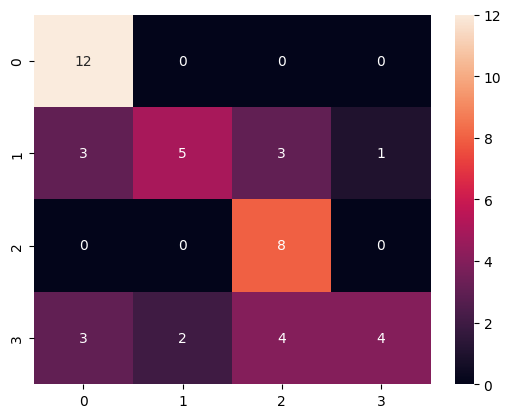

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")